In [ ]:
! git clone https://github.com/materialsgenomefoundation/kawin

%cd kawin

! pip install -e .

Cloning into 'kawin'...
remote: Enumerating objects: 1968, done.
remote: Counting objects: 100% (260/260), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 1968 (delta 202), reused 182 (delta 176), pack-reused 1708 (from 1)
Receiving objects: 100% (1968/1968), 159.05 MiB | 16.80 MiB/s, done.
Resolving deltas: 100% (1269/1269), done.
/content/kawin
Obtaining file:///content/kawin
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.0/244.0 kB 18.1 MB/s eta 0:

In [ ]:
from kawin.thermo import MulticomponentThermodynamics

phases = ['FCC_A1', 'MGSI_B_P', 'MG5SI6_B_DP', 'B_PRIME_L', 'U1_PHASE', 'U2_PHASE']
therm = MulticomponentThermodynamics('/content/kawin/examples/AlMgSi.tdb', ['AL', 'MG', 'SI'], phases)

([0, 16, 17], [448.15, 448.15, 523.15])


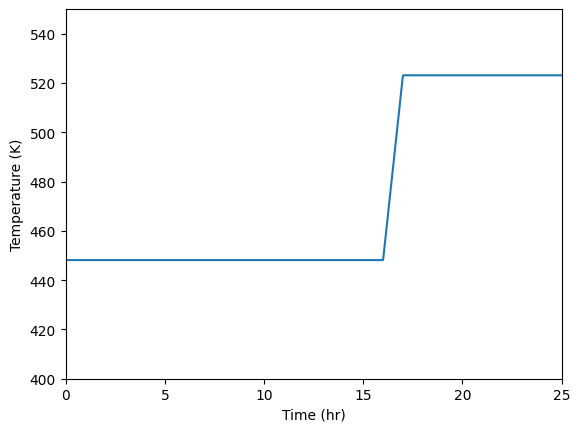

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from kawin.precipitation.PrecipitationParameters import TemperatureParameters

lowTemp = 175+273.15
highTemp = 250+273.15
temperature = TemperatureParameters([0, 16, 17], [lowTemp, lowTemp, highTemp])

time = np.linspace(0, 25*3600, 1000)
plt.plot(time/3600, temperature(time))
plt.xlim([0, 25])
plt.ylim([400, 550])
plt.xlabel('Time (hr)')
plt.ylabel('Temperature (K)')
plt.show()

In [ ]:
from kawin.precipitation import MatrixParameters, PrecipitateParameters

matrix = MatrixParameters(['MG', 'SI'])
matrix.initComposition = [0.0072, 0.0057]
matrix.volume.setVolume(1e-5, 'VM', 4)

gamma = {
    'MGSI_B_P': 0.18,
    'MG5SI6_B_DP': 0.084,
    'B_PRIME_L': 0.18,
    'U1_PHASE': 0.18,
    'U2_PHASE': 0.18
        }

precipitates = []
for p in phases[1:]:
    params = PrecipitateParameters(p)
    params.gamma = gamma[p]
    params.volume.setVolume(1e-5, 'VM', 4)
    params.nucleation.setNucleationType('bulk')
    precipitates.append(params)

In [ ]:
from kawin.precipitation import PrecipitateModel
from kawin.solver import SolverType

model = PrecipitateModel(
    thermodynamics=therm,
    matrixParameters=matrix,
    precipitateParameters=precipitates,
    temperatureParameters=temperature
)
model.solve(25*3600, solverType=SolverType.EXPLICITEULER, verbose=True, vIt=10000)

/content/kawin/kawin/precipitation/NucleationRate.py:190: RuntimeWarning: divide by zero encountered in divide
  incubationTime = np.amin([np.exp(-tau[indices] / time), np.ones(tau[indices].shape)], axis=0)


N	Time (s)	Sim Time (s)	Temperature (K)	MG	SI	
0	0.0e+00		0.0		448		0.7200	0.5700	

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	MGSI_B_P	0.000e+00		0.0000		0.0000e+00	1.2936e+04
	MG5SI6_B_DP	0.000e+00		0.0000		0.0000e+00	6.4822e+03
	B_PRIME_L	0.000e+00		0.0000		0.0000e+00	8.0257e+03
	U1_PHASE	0.000e+00		0.0000		0.0000e+00	7.5301e+03
	U2_PHASE	0.000e+00		0.0000		0.0000e+00	7.1719e+03

N	Time (s)	Sim Time (s)	Temperature (K)	MG	SI	
10000	6.1e+04		446.3		523		0.0631	0.2068	

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	MGSI_B_P	2.552e+22		1.0228		4.5237e-09	7.9564e+02
	MG5SI6_B_DP	0.000e+00		0.0000		0.0000e+00	-4.5460e+03
	B_PRIME_L	2.138e+08		0.0000		1.1093e-09	-1.8482e+03
	U1_PHASE	0.000e+00		0.0000		0.0000e+00	1.2992e+03
	U2_PHASE	0.000e+00		0.0000		0.0000e+00	-3.5889e+02

N	Time (s)	Sim Time (s)	Temperature (K)	MG	SI	
16428	9.0e+04		680.6		523		0.0566	0.2032	

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving

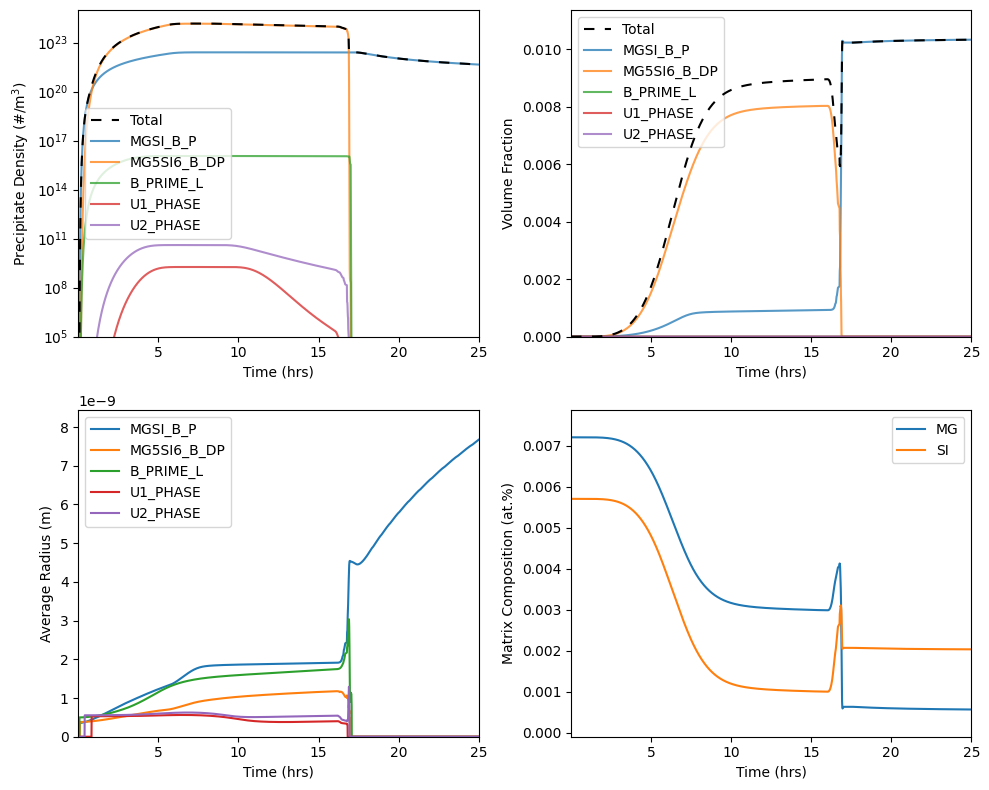

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

model.plot(axes[0,0], 'Total Precipitate Density', timeUnits='h', label='Total', color='k', linestyle=(0,(5,5)), zorder=6)
model.plot(axes[0,0], 'Precipitate Density', timeUnits='h', alpha=0.75)
axes[0,0].set_ylim([1e5, 1e25])
axes[0,0].set_xscale('linear')
axes[0,0].set_yscale('log')

model.plot(axes[0,1], 'Total Volume Fraction', timeUnits='h', label='Total', color='k', linestyle=(0,(5,5)), zorder=6)
model.plot(axes[0,1], 'Volume Fraction', timeUnits='h', alpha=0.75)
axes[0,1].set_xscale('linear')

model.plot(axes[1,0], 'Average Radius', timeUnits='h')
axes[1,0].set_xscale('linear')

model.plot(axes[1,1], 'Composition', timeUnits='h')
axes[1,1].set_xscale('linear')

fig.tight_layout()
